In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #instalar pacote tensorflow e keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2 #instalar pacote opencv
import os

In [40]:
img = image.load_img("C:/Users/Joao_Pedro/Desktop/Data_Set/Treino/Man/1a7657dda8b19def.jpg")

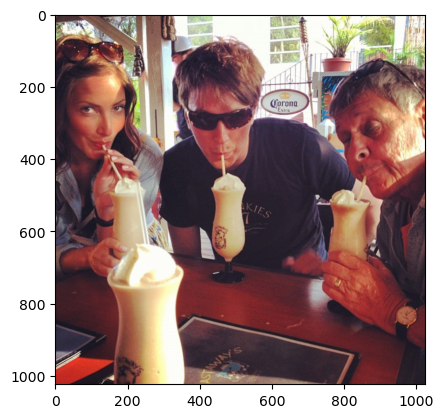

In [41]:
plt.imshow(img)

In [97]:
cv2.imread("C:/Users/Joao_Pedro/Desktop/Data_Set/Treino/Man/1a7657dda8b19def.jpg")

array([[[ 67,  78, 128],
        [ 69,  78, 128],
        [ 69,  79, 127],
        ...,
        [236, 246, 253],
        [224, 234, 241],
        [214, 223, 232]],

       [[ 75,  86, 136],
        [ 73,  85, 133],
        [ 74,  84, 132],
        ...,
        [237, 247, 254],
        [220, 230, 237],
        [206, 216, 223]],

       [[ 82,  95, 141],
        [ 79,  92, 138],
        [ 78,  89, 133],
        ...,
        [242, 251, 255],
        [215, 225, 232],
        [197, 207, 214]],

       ...,

       [[ 33,  37, 185],
        [ 33,  37, 185],
        [ 32,  36, 184],
        ...,
        [ 41,  29,  35],
        [ 41,  29,  35],
        [ 41,  29,  35]],

       [[ 35,  39, 187],
        [ 34,  38, 186],
        [ 33,  37, 185],
        ...,
        [ 42,  30,  36],
        [ 41,  29,  35],
        [ 41,  29,  35]],

       [[ 36,  40, 188],
        [ 35,  39, 187],
        [ 34,  38, 186],
        ...,
        [ 41,  29,  35],
        [ 41,  29,  35],
        [ 40,  28,  34]]

In [98]:
cv2.imread("C:/Users/Joao_Pedro/Desktop/Data_Set/Treino/Man/1a7657dda8b19def.jpg").shape

(1024, 1024, 3)

In [99]:
train = ImageDataGenerator(rescale = 1/255)      #normaliza os valores da matriz gerada pelo comando cv2.imread
validation = ImageDataGenerator(rescale = 1/255)

In [109]:
train_dataset = train.flow_from_directory("C:/Users/Joao_Pedro/Desktop/Data_Set/Treino/",
                                         target_size = (600,600), #padroniza o tamanho das imagens
                                         batch_size = 10,         #tamanho do batch/quantidade de exemplares por iteração 
                                         class_mode = 'binary')   #classificação binária: ou "Cadeirante", ou "não cadeirante"

validation_dataset = train.flow_from_directory("C:/Users/Joao_Pedro/Desktop/Data_Set/Validacao/",
                                         target_size = (600,600),
                                         batch_size = 2,
                                         class_mode = 'binary')

Found 319 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [64]:
train_dataset.class_indices

{'Man': 0, 'Wheelchair': 1}

In [65]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [101]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = "relu", input_shape =(600,600,3)),
                                   tf.keras.layers.MaxPool2D(2,2), #estudar numero de canais
                                   
                                   tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   
                                   tf.keras.layers.Dense(512, activation = "relu"),
                                   
                                   tf.keras.layers.Dense(1, activation = "sigmoid")])

In [116]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

In [118]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 32,
                     epochs = 5,
                     validation_data = validation_dataset)

Epoch 1/5
32/32 [==============================] - 50s 2s/step - loss: 0.3902 - accuracy: 0.8401 - val_loss: 1.8609 - val_accuracy: 0.3929
Epoch 2/5
32/32 [==============================] - 51s 2s/step - loss: 0.2736 - accuracy: 0.8966 - val_loss: 4.9863 - val_accuracy: 0.3929
Epoch 3/5
32/32 [==============================] - 49s 2s/step - loss: 0.1620 - accuracy: 0.9498 - val_loss: 5.0082 - val_accuracy: 0.4286
Epoch 4/5
32/32 [==============================] - 48s 2s/step - loss: 0.0611 - accuracy: 0.9812 - val_loss: 5.7472 - val_accuracy: 0.5714
Epoch 5/5
32/32 [==============================] - 50s 2s/step - loss: 0.0528 - accuracy: 0.9843 - val_loss: 9.1280 - val_accuracy: 0.5000


In [120]:
dir_path = 'C:/Users/Joao_Pedro/Desktop/Data_Set/Teste'

for i in os.listdir(dir_path):
    print(i)

0ee4b5807b732e55.jpg
0fbdca0ebe930ffe.jpg
2e23ef9512ce5817.jpg
3c391da21bc800c4.jpg
dd8b657ff1214142.jpg
de94e1661e4149de.jpg
dfc588beac06d99f.jpg
e7aa0a980df9ebbc.jpg
ea49c96cef84458c.jpg
ee703e3ed4a207f0.jpg
f19f2ca6c9d5dca4.jpg
f4ae75d0e8701e53.jpg
f6620972fade3edf.jpg
f7a66c74595bbfd9.jpg
f8491ae43aae7406.jpg
f9f7c2b35997abf3.jpg
fa9b771ed66c044a.jpg
fb00ba93f09546a4.jpg
fc3f47ed9cf888be.jpg
fe0c0e1a21a552f2.jpg


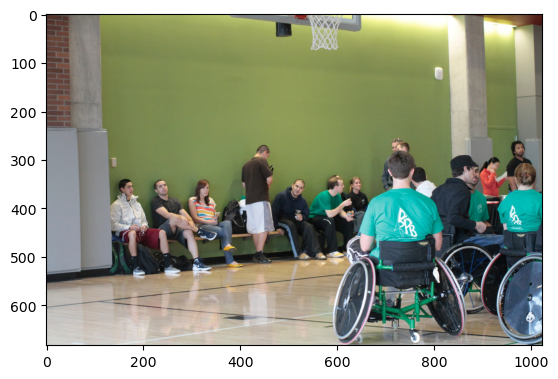

In [121]:
dir_path = 'C:/Users/Joao_Pedro/Desktop/Data_Set/Teste'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i)
    plt.imshow(img)

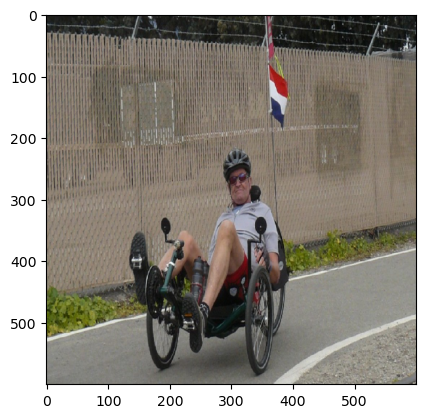

1/1 [==============================] - 0s 68ms/step
cadeirante


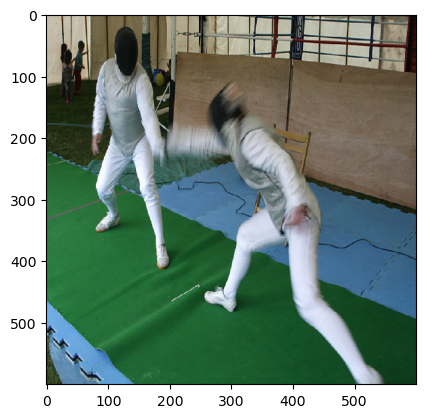

1/1 [==============================] - 0s 57ms/step
não cadeirante


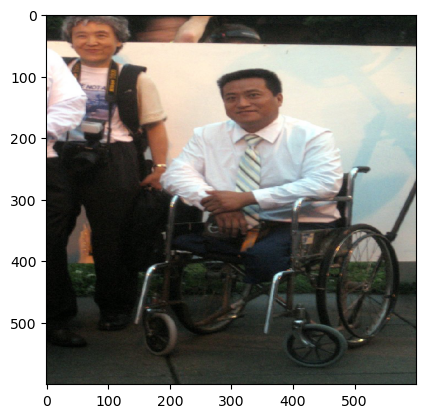

1/1 [==============================] - 0s 66ms/step
não cadeirante


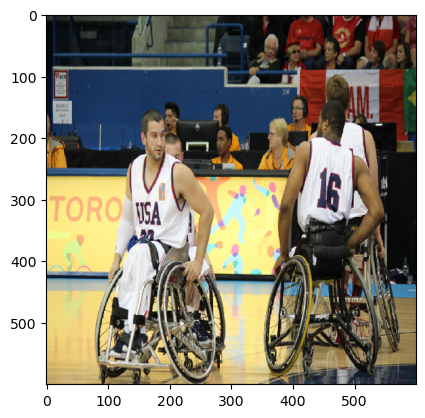

1/1 [==============================] - 0s 66ms/step
não cadeirante


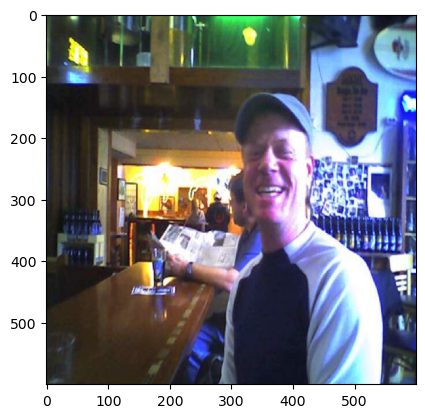

1/1 [==============================] - 0s 65ms/step
não cadeirante


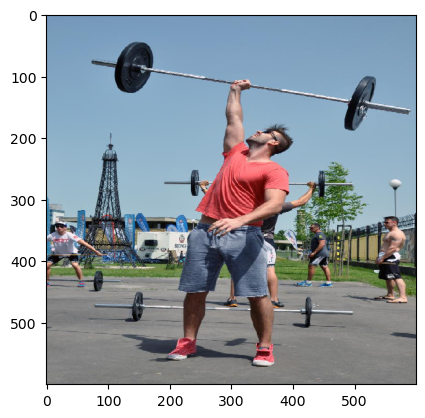

1/1 [==============================] - 0s 56ms/step
não cadeirante


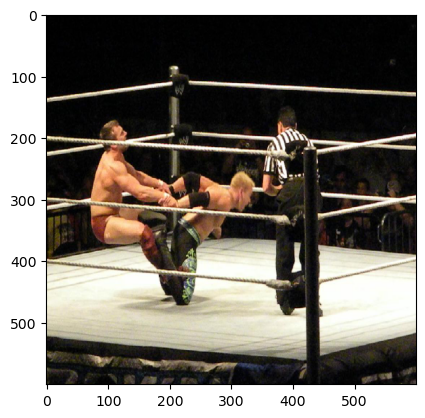

1/1 [==============================] - 0s 64ms/step
não cadeirante


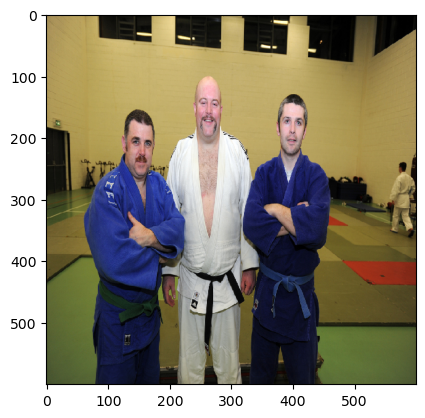

1/1 [==============================] - 0s 60ms/step
cadeirante


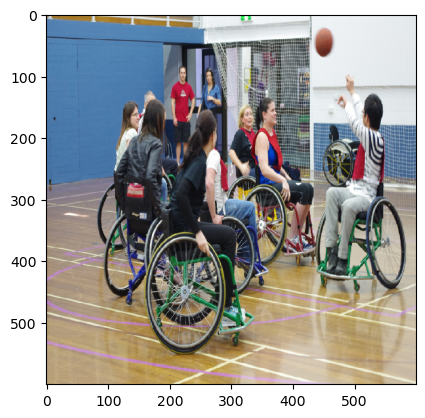

1/1 [==============================] - 0s 63ms/step
cadeirante


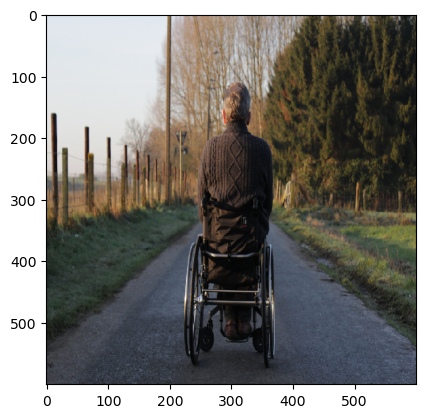

1/1 [==============================] - 0s 66ms/step
cadeirante


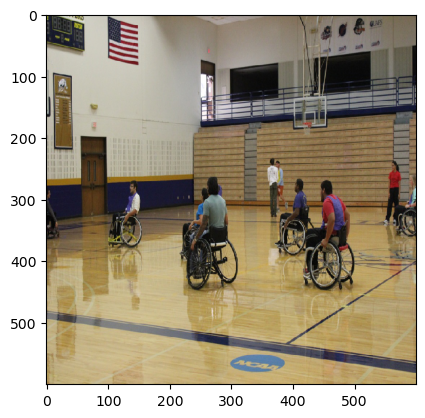

1/1 [==============================] - 0s 66ms/step
não cadeirante


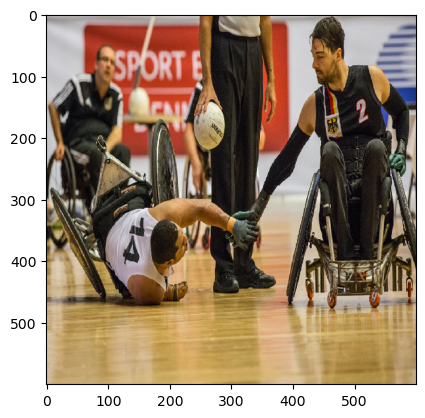

1/1 [==============================] - 0s 68ms/step
não cadeirante


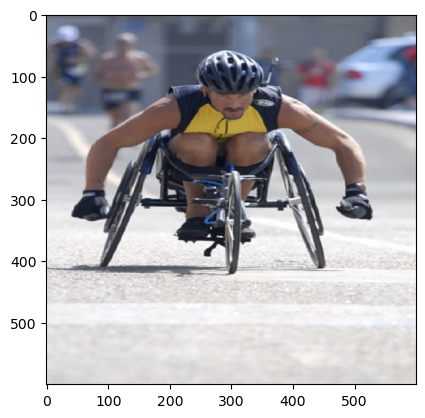

1/1 [==============================] - 0s 63ms/step
não cadeirante


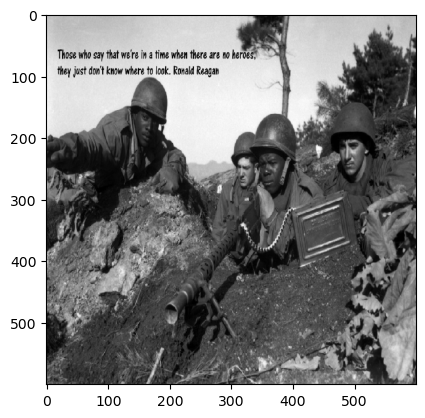

1/1 [==============================] - 0s 53ms/step
não cadeirante


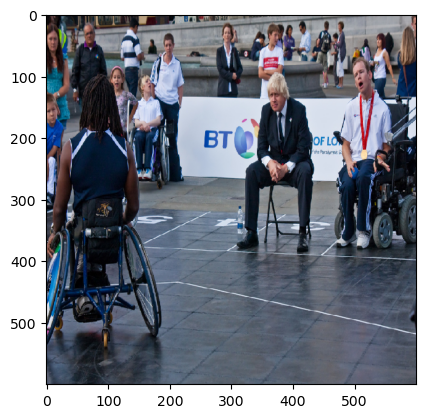

1/1 [==============================] - 0s 52ms/step
não cadeirante


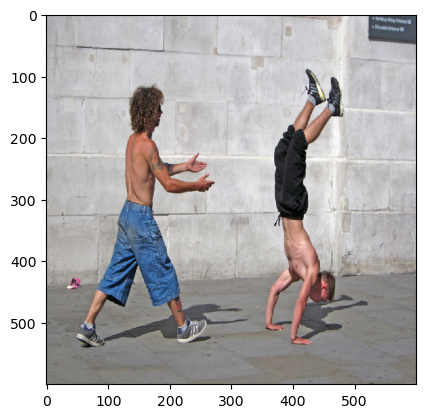

1/1 [==============================] - 0s 53ms/step
não cadeirante


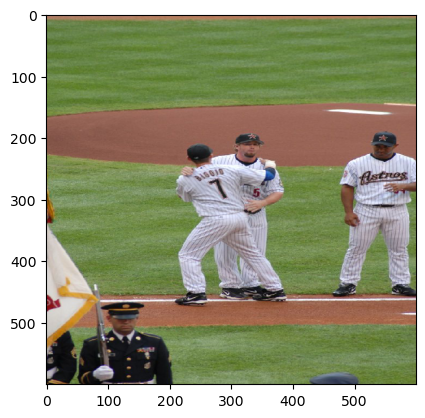

1/1 [==============================] - 0s 53ms/step
não cadeirante


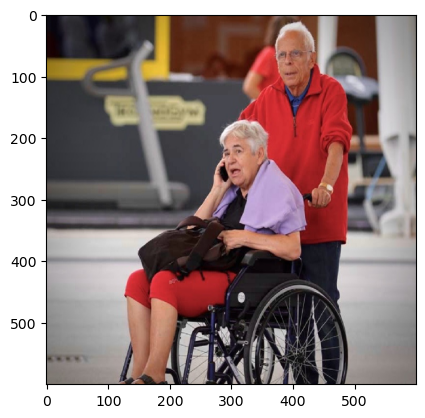

1/1 [==============================] - 0s 53ms/step
cadeirante


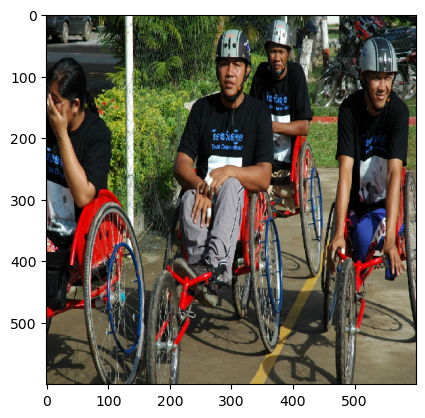

1/1 [==============================] - 0s 53ms/step
não cadeirante


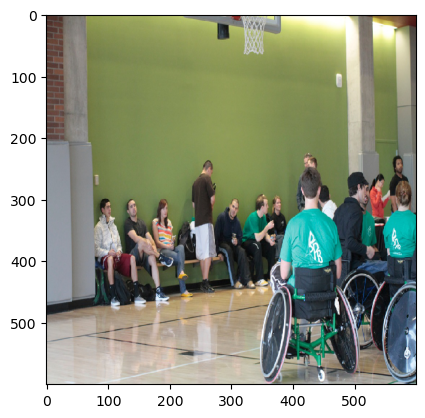

1/1 [==============================] - 0s 54ms/step
cadeirante
Acurácia de 60.0%


In [122]:
dir_path = 'C:/Users/Joao_Pedro/Desktop/Data_Set/Teste'
answer = [1,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1,1,1]
index = 0
score = 0

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size = (600,600))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print('não cadeirante')
    else:
        print('cadeirante')
    if val == answer[index]:
        score += 1
    index += 1
print (f'Acurácia de {100*score/20}%')
    